# Regresión No Lineal (Polinómica) para Predicción de Humedad/Temperatura (_2)
Este notebook implementa un modelo de regresión polinómica para predecir valores continuos, e incluye curvas de aprendizaje, validación, paridad, sesgo-varianza y explicaciones breves.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar el dataset
dataset = pd.read_csv('../dataset/ML1_temperature.xlsx - Hoja1.csv', decimal=',')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [3]:
# Separar en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

## Curva de aprendizaje
Muestra cómo varía el error a medida que aumenta el tamaño del conjunto de entrenamiento.

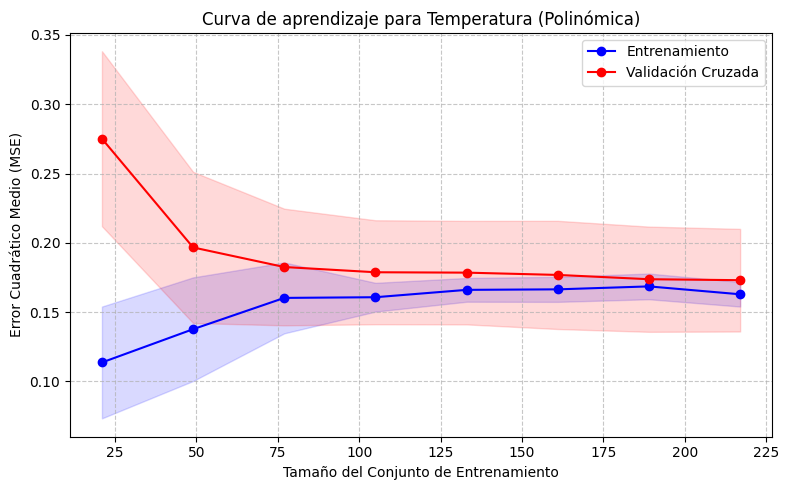

Comentario/análisis:
- MSE Final Entrenamiento: 0.1629
- MSE Final Validación: 0.1731
Diagnóstico: BUENO


In [7]:
# Curva de aprendizaje para Temperatura (Polinómica)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, x_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 8), shuffle=True, random_state=42
)

train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Entrenamiento')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validación Cruzada')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.15)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='red', alpha=0.15)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Curva de aprendizaje para Temperatura (Polinómica)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análisis automático
print('Comentario/análisis:')
print(f'- MSE Final Entrenamiento: {train_scores_mean[-1]:.4f}')
print(f'- MSE Final Validación: {val_scores_mean[-1]:.4f}')
if train_scores_mean[-1] > 1 and val_scores_mean[-1] > 1:
    print('Diagnóstico: SUBAJUSTE')
elif abs(train_scores_mean[-1] - val_scores_mean[-1]) > 1:
    print('Diagnóstico: SOBREAJUSTE')
else:
    print('Diagnóstico: BUENO')

## Curva de validación
Muestra el desempeño del modelo para diferentes grados polinómicos.

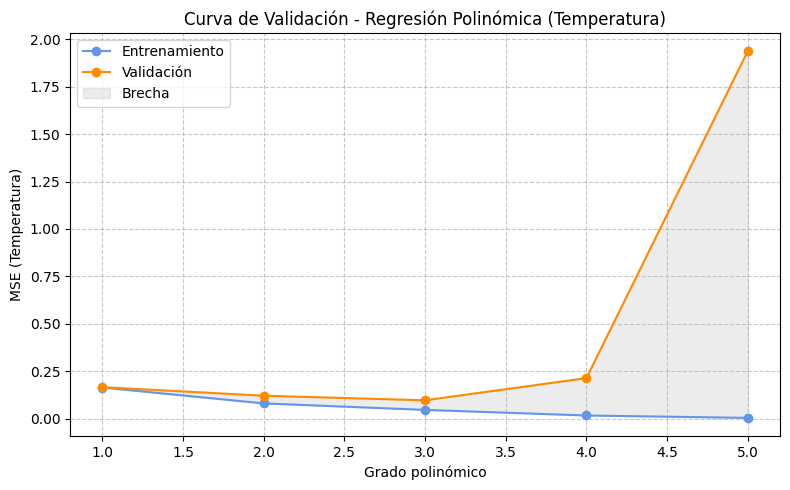

Mejor grado polinómico: 3


In [6]:
# Curva de validación del modelo polinómico para temperatura
from sklearn.preprocessing import PolynomialFeatures

degrees = np.arange(1, 6)
train_scores, val_scores = [], []
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    x_train_poly = poly.fit_transform(x_train)
    x_val_poly = poly.transform(x_val)
    model = LinearRegression().fit(x_train_poly, y_train)
    train_scores.append(mean_squared_error(y_train, model.predict(x_train_poly)))
    val_scores.append(mean_squared_error(y_val, model.predict(x_val_poly)))

plt.figure(figsize=(8,5))
plt.plot(degrees, train_scores, marker='o', color='cornflowerblue', label='Entrenamiento')
plt.plot(degrees, val_scores, marker='o', color='darkorange', label='Validación')
plt.fill_between(degrees, train_scores, val_scores, color='gray', alpha=0.15, label='Brecha')
plt.xlabel('Grado polinómico')
plt.ylabel('MSE (Temperatura)')
plt.title('Curva de Validación - Regresión Polinómica (Temperatura)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mejor grado
mejor_indice = np.argmin(val_scores)
mejor_grado = degrees[mejor_indice]
print(f'Mejor grado polinómico: {mejor_grado}')

## Curva de paridad
Compara las predicciones del modelo con los valores reales.

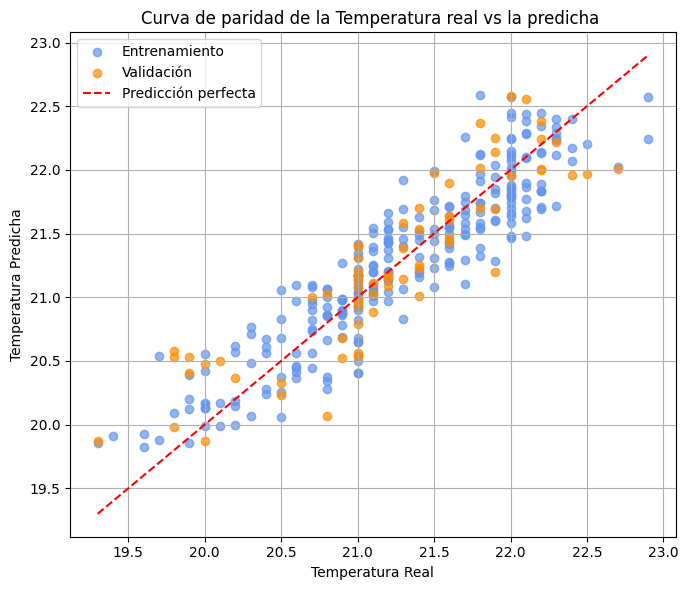

ENTRENANDO MODELO POLINÓMICO PARA TEMPERATURA
MSE Entrenamiento: 0.0799
MSE Validación: 0.1204
R² Validación: 0.7761


In [15]:
# Curva de paridad de la temperatura real vs la predicha (Polinómica)
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
model = LinearRegression().fit(x_train_poly, y_train)
y_train_pred = model.predict(x_train_poly)
y_val_pred = model.predict(x_val_poly)
plt.figure(figsize=(7,6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Entrenamiento', color='cornflowerblue')
plt.scatter(y_val, y_val_pred, alpha=0.7, label='Validación', color='darkorange')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Predicción perfecta')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title('Curva de paridad de la Temperatura real vs la predicha ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('ENTRENANDO MODELO POLINÓMICO PARA TEMPERATURA')
print(f"MSE Entrenamiento: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MSE Validación: {mean_squared_error(y_val, y_val_pred):.4f}")
print(f"R² Validación: {r2_score(y_val, y_val_pred):.4f}")

## Curva de sesgo y varianza
Analiza la diferencia entre el error de entrenamiento y validación.

ESTADÍSTICAS DETALLADAS
R² en prueba: 0.7761
Error absoluto promedio: 0.2806
Error máximo: 0.7818
Error mínimo: 0.0029
Desviación estándar del error: 0.2042


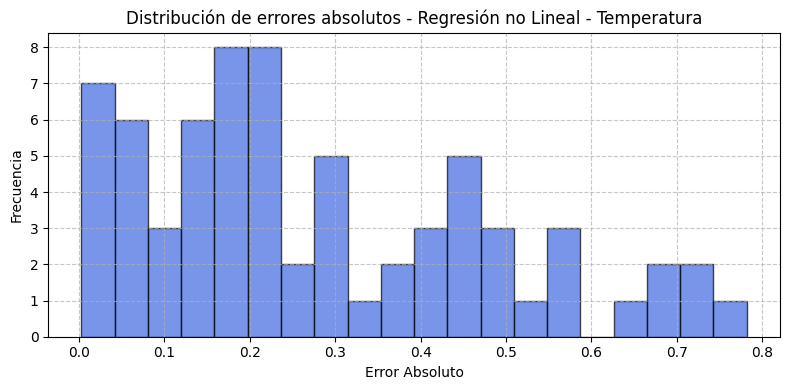

In [18]:
# Estadísticas detalladas y resumen de errores para Temperatura (Polinómica)
error_abs = np.abs(y_val.ravel() - y_val_pred.ravel())
err_mean = np.mean(error_abs)
err_max = np.max(error_abs)
err_min = np.min(error_abs)
err_std = np.std(error_abs)

print('ESTADÍSTICAS DETALLADAS')
print(f'R² en prueba: {r2_score(y_val, y_val_pred):.4f}')
print(f'Error absoluto promedio: {err_mean:.4f}')
print(f'Error máximo: {err_max:.4f}')
print(f'Error mínimo: {err_min:.4f}')
print(f'Desviación estándar del error: {err_std:.4f}')

# Histograma de la distribución de errores absolutos (Temperatura)
plt.figure(figsize=(8,4))
plt.hist(error_abs, bins=20, color='royalblue', edgecolor='black', alpha=0.7)
plt.xlabel('Error Absoluto')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores absolutos - Regresión no Lineal - Temperatura')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Gráfica de errores absolutos en el tiempo (No Lineal - Temperatura)
error_abs = np.abs(y_val.ravel() - y_val_pred.ravel())
plt.figure(figsize=(12,4))
plt.plot(error_abs, color='orange', label='Error absoluto')
plt.axhline(np.mean(error_abs), color='red', linestyle='--', label=f'Error promedio: {np.mean(error_abs):.4f}')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Error Absoluto')
plt.title('Evolución del error absoluto en el tiempo - No Lineal (Temperatura)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histograma de la distribución de errores absolutos (No Lineal - Temperatura)
plt.figure(figsize=(8,4))
plt.hist(error_abs, bins=20, color='goldenrod', edgecolor='black', alpha=0.7)
plt.xlabel('Error Absoluto')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores absolutos - Regresión No Lineal - Temperatura')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tabla resumen de métricas para Temperatura (No Lineal)
from IPython.display import display, HTML
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
err_mean = np.mean(error_abs)
err_max = np.max(error_abs)
err_min = np.min(error_abs)
err_std = np.std(error_abs)

html_table = f'''
<table style="border-collapse:collapse; width:50%">
<tr><th style="border:1px solid black; padding:4px">Métrica</th><th style="border:1px solid black; padding:4px">Regresión No Lineal</th></tr>
<tr><td style="border:1px solid black; padding:4px">MSE (Test)</td><td style="border:1px solid black; padding:4px">{mse:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">R² (Test)</td><td style="border:1px solid black; padding:4px">{r2:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Promedio</td><td style="border:1px solid black; padding:4px">{err_mean:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Máximo</td><td style="border:1px solid black; padding:4px">{err_max:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Mínimo</td><td style="border:1px solid black; padding:4px">{err_min:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Desviación Estándar del Error</td><td style="border:1px solid black; padding:4px">{err_std:.4f}</td></tr>
</table>'''
display(HTML(html_table))

## Explicación breve
La regresión polinómica permite modelar relaciones no lineales. El compromiso sesgo-varianza se observa comparando el error de entrenamiento y validación para diferentes grados polinómicos.

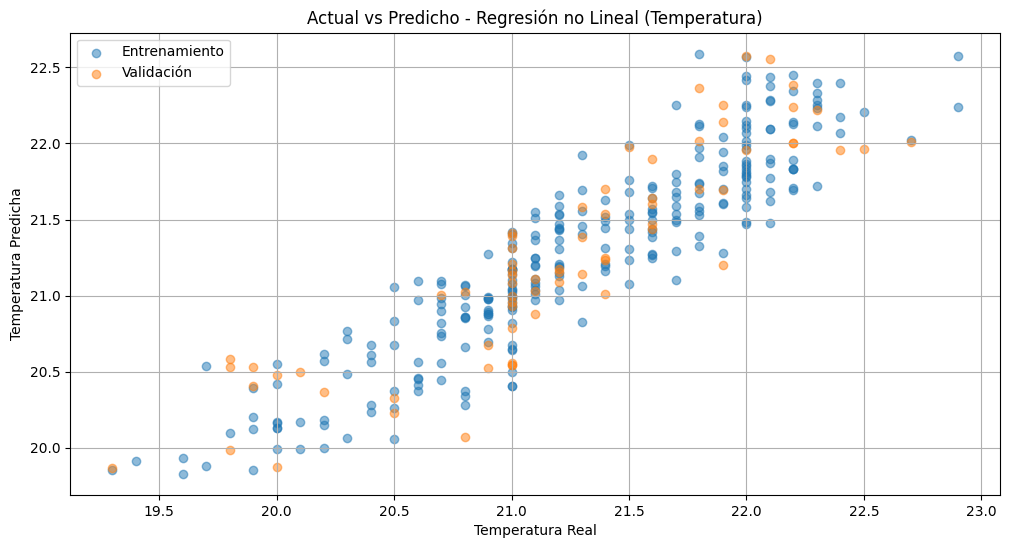

In [16]:
# Actual vs Predicho (Entrenamiento y Validación) - Regresión Polinómica (Temperatura)
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Entrenamiento')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validación')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title('Actual vs Predicho - Regresión no Lineal (Temperatura)')
plt.legend()
plt.grid(True)
plt.show()

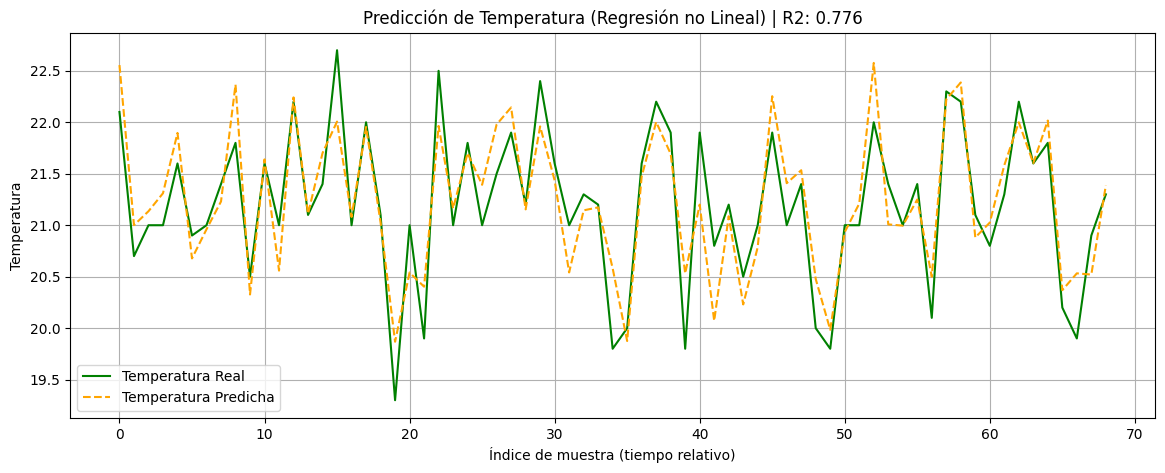

In [17]:
# Serie temporal: Temperatura real vs predicha (validación)
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, label='Temperatura Real', color='green')
plt.plot(np.arange(len(y_val_pred)), y_val_pred, label='Temperatura Predicha', color='orange', linestyle='--')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Temperatura')
plt.title(f'Predicción de Temperatura (Regresión no Lineal) | R2: {r2_score(y_val, y_val_pred):.3f}')
plt.legend()
plt.grid(True)
plt.show()

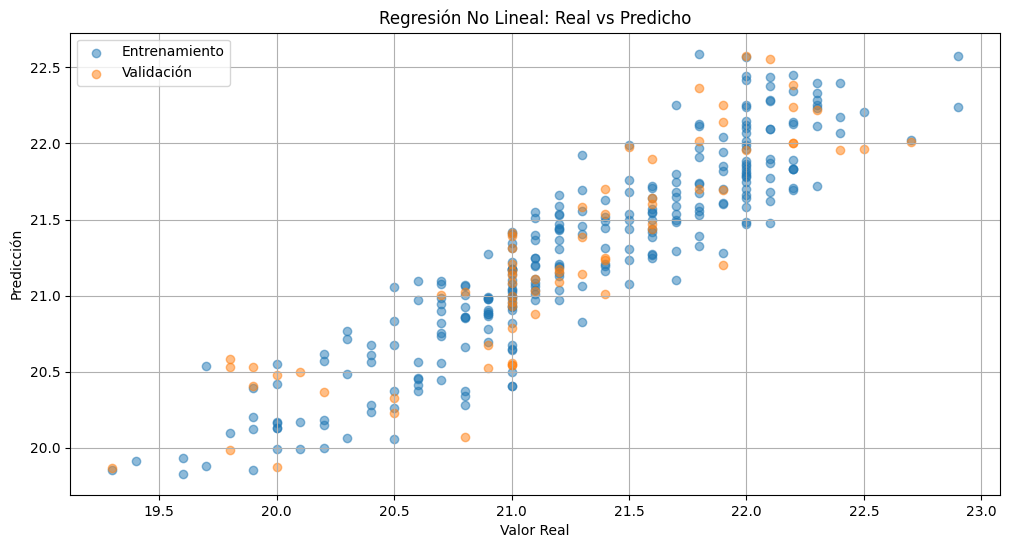

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Entrenamiento')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validación')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Regresión No Lineal: Real vs Predicho')
plt.legend()
plt.grid(True)
plt.show()

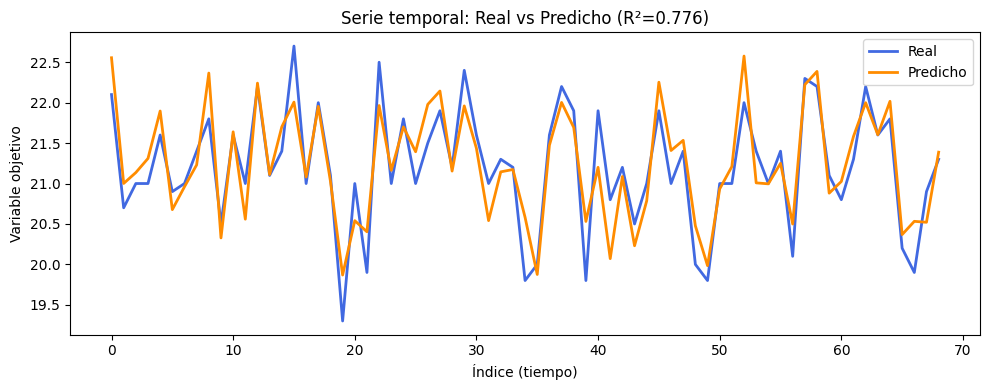

In [13]:
# Serie temporal: valores reales vs predichos
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(10,4))
plt.plot(range(len(y_val)), y_val, label='Real', color='royalblue', linewidth=2)
plt.plot(range(len(y_val_pred)), y_val_pred, label='Predicho', color='darkorange', linewidth=2)
plt.xlabel('Índice (tiempo)')
plt.ylabel('Variable objetivo')
plt.title(f'Serie temporal: Real vs Predicho (R²={r2_score(y_val, y_val_pred):.3f})')
plt.legend()
plt.tight_layout()
plt.show()